# Import Packages

In [1]:
!pip install torchinfo
colab = True

In [2]:
if colab:
    from google.colab import drive
    drive.mount('/content/gdrive', force_remount=True)

    import sys
    sys.path.append('/content/gdrive/Shared drives/ECE C247/Final Project/Code')

Mounted at /content/gdrive


In [3]:
from lib.utilities import *
from lib.trainer import *
from lib.nn_models import *
from lib.plotting import *

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch import optim

from torchinfo import summary

if colab:
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
    device = torch.cuda.device("cuda")

In [4]:
if colab:
    data_path = '/content/gdrive/Shared drives/ECE C247/Final Project/Data'
else:
    data_path = '../Data'

# Classify CNN Model on Single Subject(s)

In [6]:
# define constants
constants = { 
    'alpha': 1.0, # default = 1.0
    'dropout': 0.5
}

NUM_EPOCHS = 50 # 50

NUM_SUBJECTS = 9

#### CNN Model

In [58]:
# define model/optimizer
model = CNN_Model(constants)
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.001)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [59]:
# train on each subject and save best accuracy
single_train, single_test, single_val, losses = [], [], [], []
for i in range(NUM_SUBJECTS):
    X_train_valid, y_train_valid, X_test, y_test = load_data(data_path, subjects=[i], verbose=False)
    data_loaders = setup_data(X_train_valid, y_train_valid, X_test, y_test, batch_size=64, colab=colab, verbose=False)

    print(f'\t\t*** SUBJECT {i+1} ***')
    # *** if someone can get the verbose='short' to work here that would be the ucciest of gucci but not super important ***
    metrics = run_training_validation(model, optimizer, data_loaders, NUM_EPOCHS, verbose=False)
    test_acc, test_loss = run_test(model, data_loaders, verbose=False)

    single_train.append(metrics['train_accuracy'])
    single_test.append(test_acc)
    single_val.append(metrics['val_accuracy'])

print(f'Training Accuracies: {single_train}')
print(f'Test Accuracies: {single_test}')
print(f'Validation Accuracies: {single_val}')

		*** SUBJECT 1 ***
		*** SUBJECT 2 ***
		*** SUBJECT 3 ***
		*** SUBJECT 4 ***
		*** SUBJECT 5 ***
		*** SUBJECT 6 ***
		*** SUBJECT 7 ***
		*** SUBJECT 8 ***
		*** SUBJECT 9 ***
Training Accuracies: [[tensor(31.6344, device='cpu'), tensor(44.3761, device='cpu'), tensor(55.6239, device='cpu'), tensor(66.4323, device='cpu'), tensor(71.0896, device='cpu'), tensor(73.5501, device='cpu'), tensor(77.5923, device='cpu'), tensor(81.9859, device='cpu'), tensor(83.1283, device='cpu'), tensor(87.3462, device='cpu'), tensor(87.8735, device='cpu'), tensor(91.3884, device='cpu'), tensor(92.1793, device='cpu'), tensor(92.3550, device='cpu'), tensor(94.2003, device='cpu'), tensor(93.6731, device='cpu'), tensor(93.4095, device='cpu'), tensor(94.7276, device='cpu'), tensor(96.9244, device='cpu'), tensor(96.4851, device='cpu'), tensor(96.9244, device='cpu'), tensor(97.3638, device='cpu'), tensor(96.7487, device='cpu'), tensor(97.2759, device='cpu'), tensor(97.5395, device='cpu'), tensor(96.2214, device

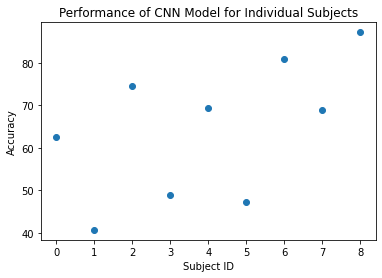

In [60]:
# *** figure out what to plot ***
plot_single_subjects(single_test, model='CNN')

CNN+LSTM Model

In [61]:
# define model/optimizer
model = CNN_LSTM_Model(constants)
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.001)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [62]:
# train on each subject and save best accuracy
single_train, single_test, single_val, losses = [], [], [], []
for i in range(NUM_SUBJECTS):
    X_train_valid, y_train_valid, X_test, y_test = load_data(data_path, subjects=[i], verbose=False)
    data_loaders = setup_data(X_train_valid, y_train_valid, X_test, y_test, batch_size=64, colab=colab, verbose=False)

    print(f'\t\t*** SUBJECT {i+1} ***')
    # *** if someone can get the verbose='short' to work here that would be the ucciest of gucci but not super important ***
    metrics = run_training_validation(model, optimizer, data_loaders, NUM_EPOCHS, verbose=False)
    test_acc, test_loss = run_test(model, data_loaders, verbose=False)

    single_train.append(metrics['train_accuracy'])
    single_test.append(test_acc)
    single_val.append(metrics['val_accuracy'])

print(f'Training Accuracies: {single_train}')
print(f'Test Accuracies: {single_test}')
print(f'Validation Accuracies: {single_val}')

		*** SUBJECT 1 ***
		*** SUBJECT 2 ***
		*** SUBJECT 3 ***
		*** SUBJECT 4 ***
		*** SUBJECT 5 ***
		*** SUBJECT 6 ***
		*** SUBJECT 7 ***
		*** SUBJECT 8 ***
		*** SUBJECT 9 ***
Training Accuracies: [[tensor(30.2285, device='cpu'), tensor(36.2917, device='cpu'), tensor(42.8822, device='cpu'), tensor(55.8875, device='cpu'), tensor(58.6116, device='cpu'), tensor(64.5870, device='cpu'), tensor(67.2232, device='cpu'), tensor(69.8594, device='cpu'), tensor(72.5835, device='cpu'), tensor(73.0229, device='cpu'), tensor(74.6924, device='cpu'), tensor(78.3831, device='cpu'), tensor(79.5255, device='cpu'), tensor(79.9649, device='cpu'), tensor(80.7557, device='cpu'), tensor(84.8858, device='cpu'), tensor(86.9069, device='cpu'), tensor(88.5764, device='cpu'), tensor(87.9613, device='cpu'), tensor(87.8735, device='cpu'), tensor(91.3884, device='cpu'), tensor(91.7399, device='cpu'), tensor(92.4429, device='cpu'), tensor(92.1793, device='cpu'), tensor(93.3216, device='cpu'), tensor(93.2337, device

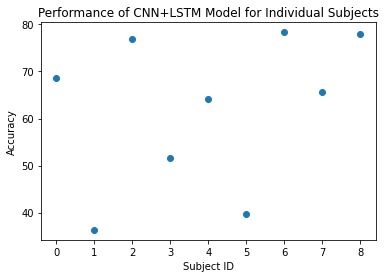

In [63]:
plot_single_subjects(single_test, model='CNN+LSTM')

CNN+GRU

In [7]:
# define model/optimizer
model = CNN_GRU_Model(constants)
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.001)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [8]:
# train on each subject and save best accuracy
single_train, single_test, single_val, losses = [], [], [], []
for i in range(NUM_SUBJECTS):
    X_train_valid, y_train_valid, X_test, y_test = load_data(data_path, subjects=[i], verbose=False)
    data_loaders = setup_data(X_train_valid, y_train_valid, X_test, y_test, batch_size=64, colab=colab, verbose=False)

    print(f'\t\t*** SUBJECT {i+1} ***')
    # *** if someone can get the verbose='short' to work here that would be the ucciest of gucci but not super important ***
    metrics = run_training_validation(model, optimizer, data_loaders, NUM_EPOCHS, verbose=False)
    test_acc, test_loss = run_test(model, data_loaders, verbose=False)

    single_train.append(metrics['train_accuracy'])
    single_test.append(test_acc)
    single_val.append(metrics['val_accuracy'])

print(f'Training Accuracies: {single_train}')
print(f'Test Accuracies: {single_test}')
print(f'Validation Accuracies: {single_val}')

		*** SUBJECT 1 ***


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/conv.py:443: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at  ../aten/src/ATen/native/Convolution.cpp:647.)
  self.padding, self.dilation, self.groups)


		*** SUBJECT 2 ***
		*** SUBJECT 3 ***
		*** SUBJECT 4 ***
		*** SUBJECT 5 ***
		*** SUBJECT 6 ***
		*** SUBJECT 7 ***
		*** SUBJECT 8 ***
		*** SUBJECT 9 ***
Training Accuracies: [[tensor(34.3585, device='cpu'), tensor(44.9912, device='cpu'), tensor(53.1634, device='cpu'), tensor(59.4025, device='cpu'), tensor(64.4991, device='cpu'), tensor(68.3656, device='cpu'), tensor(69.7715, device='cpu'), tensor(73.2865, device='cpu'), tensor(75.3954, device='cpu'), tensor(80.3163, device='cpu'), tensor(80.5800, device='cpu'), tensor(83.4798, device='cpu'), tensor(83.6555, device='cpu'), tensor(87.4341, device='cpu'), tensor(86.2039, device='cpu'), tensor(86.0281, device='cpu'), tensor(88.0492, device='cpu'), tensor(89.0158, device='cpu'), tensor(91.4763, device='cpu'), tensor(90.3339, device='cpu'), tensor(91.3884, device='cpu'), tensor(91.3005, device='cpu'), tensor(94.0246, device='cpu'), tensor(93.0580, device='cpu'), tensor(93.4095, device='cpu'), tensor(92.9701, device='cpu'), tensor(95.5

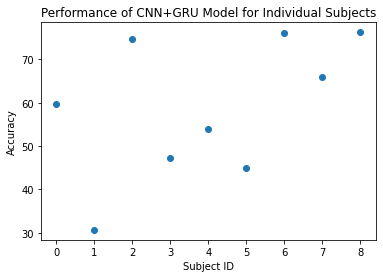

In [9]:
plot_single_subjects(single_test, model='CNN+GRU')

# Classify CNN Model Over All Subjects

In [50]:
# define constants
constants = { 
    'alpha': 1.0, # default = 1.0
    'dropout': 0.5
}

NUM_EPOCHS = 80

In [51]:
# define model/optimizer
model = CNN_Model(constants)
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.001)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [52]:
summary(model.model, (64, 22, 1, 256))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               --                        --
├─Conv2d: 1-1                            [64, 25, 1, 256]          5,525
├─ELU: 1-2                               [64, 25, 1, 256]          --
├─MaxPool2d: 1-3                         [64, 25, 1, 85]           --
├─BatchNorm2d: 1-4                       [64, 25, 1, 85]           50
├─Dropout: 1-5                           [64, 25, 1, 85]           --
├─Conv2d: 1-6                            [64, 50, 1, 85]           12,550
├─ELU: 1-7                               [64, 50, 1, 85]           --
├─MaxPool2d: 1-8                         [64, 50, 1, 28]           --
├─BatchNorm2d: 1-9                       [64, 50, 1, 28]           100
├─Dropout: 1-10                          [64, 50, 1, 28]           --
├─Conv2d: 1-11                           [64, 100, 1, 28]          50,100
├─ELU: 1-12                              [64, 100, 1, 28]          --
├─M

In [53]:
X_train_valid, y_train_valid, X_test, y_test = load_data(data_path, verbose=False)
data_loaders = setup_data(X_train_valid, y_train_valid, X_test, y_test, batch_size=64, verbose=False)

metrics = run_training_validation(model, optimizer, data_loaders, NUM_EPOCHS, verbose=True)
test_acc, test_loss = run_test(model, data_loaders, verbose=True)

Progress: Epoch 1, Loss: 1.2563663721084595, Training Accuracy: 33.264381408691406, Validation Accuracy: 37.39164733886719
Progress: Epoch 2, Loss: 1.0220613479614258, Training Accuracy: 43.68597412109375, Validation Accuracy: 49.05437088012695
Progress: Epoch 3, Loss: 1.010046124458313, Training Accuracy: 50.84712600708008, Validation Accuracy: 55.43735122680664
Progress: Epoch 4, Loss: 1.0536243915557861, Training Accuracy: 57.5157585144043, Validation Accuracy: 61.977935791015625
Progress: Epoch 5, Loss: 0.8494939804077148, Training Accuracy: 60.46099090576172, Validation Accuracy: 64.65721130371094
Progress: Epoch 6, Loss: 0.641797661781311, Training Accuracy: 63.938140869140625, Validation Accuracy: 65.9968490600586
Progress: Epoch 7, Loss: 0.7461398839950562, Training Accuracy: 65.82939147949219, Validation Accuracy: 66.74546813964844
Progress: Epoch 8, Loss: 0.8119724988937378, Training Accuracy: 69.25728607177734, Validation Accuracy: 66.11505126953125
Progress: Epoch 9, Loss: 

### Plot Results

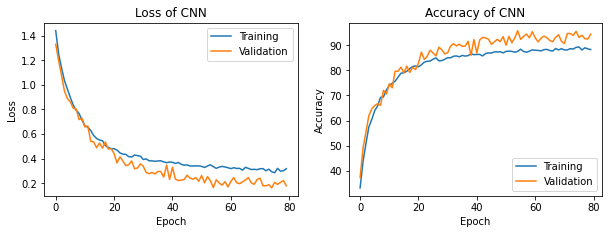

In [54]:
# Plot Results
plot_loss_acc(metrics['train_loss'], metrics['val_loss'], metrics['train_accuracy'], metrics['val_accuracy'], model='CNN')
# plot_single_model()

# Classify CNN+LSTM Model Over All Subjects

In [30]:
# define constants
constants = { 
    'alpha': 1.0, # default = 1.0
    'dropout': 0.5
}

NUM_EPOCHS = 80

NUM_SUBJECTS = 9

In [31]:
# define model/optimizer
model = LSTM_Model(constants).cuda()
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.001)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [32]:
X_train_valid, y_train_valid, X_test, y_test = load_data(data_path, verbose=False)
data_loaders = setup_data(X_train_valid, y_train_valid, X_test, y_test, batch_size=64, verbose=False)

metrics = run_training_validation(model, optimizer, data_loaders, 15, verbose=True)
test_acc, test_loss = run_test(model, data_loaders, verbose=True)

Progress: Epoch 1, Loss: 0.9402827024459839, Training Accuracy: 48.31560134887695, Validation Accuracy: 57.32860565185547
Progress: Epoch 2, Loss: 0.6472428441047668, Training Accuracy: 67.56304168701172, Validation Accuracy: 62.29314041137695
Progress: Epoch 3, Loss: 0.47511330246925354, Training Accuracy: 75.41371154785156, Validation Accuracy: 67.88809967041016
Progress: Epoch 4, Loss: 0.39849188923835754, Training Accuracy: 80.5654067993164, Validation Accuracy: 69.73995208740234
Progress: Epoch 5, Loss: 0.34490615129470825, Training Accuracy: 83.73719787597656, Validation Accuracy: 70.09455871582031
Progress: Epoch 6, Loss: 0.3009502589702606, Training Accuracy: 86.13081359863281, Validation Accuracy: 73.04964447021484
Progress: Epoch 7, Loss: 0.2676084339618683, Training Accuracy: 88.19937133789062, Validation Accuracy: 74.86209869384766
Progress: Epoch 8, Loss: 0.24215039610862732, Training Accuracy: 89.92316436767578, Validation Accuracy: 76.95035552978516
Progress: Epoch 9, Lo

In [33]:
# define model/optimizer
model = CNN_LSTM_Model(constants).cuda()
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.001)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [34]:
X_train_valid, y_train_valid, X_test, y_test = load_data(data_path, verbose=False)
data_loaders = setup_data(X_train_valid, y_train_valid, X_test, y_test, batch_size=64, verbose=False)

metrics = run_training_validation(model, optimizer, data_loaders, NUM_EPOCHS, verbose=True)
test_acc, test_loss = run_test(model, data_loaders, verbose=True)

Progress: Epoch 1, Loss: 1.261565923690796, Training Accuracy: 34.39716339111328, Validation Accuracy: 30.41765022277832
Progress: Epoch 2, Loss: 1.2784241437911987, Training Accuracy: 43.58747100830078, Validation Accuracy: 37.19464111328125
Progress: Epoch 3, Loss: 1.253045678138733, Training Accuracy: 47.06461715698242, Validation Accuracy: 43.18360900878906
Progress: Epoch 4, Loss: 1.152658462524414, Training Accuracy: 48.433807373046875, Validation Accuracy: 40.189125061035156
Progress: Epoch 5, Loss: 1.0866471529006958, Training Accuracy: 51.349483489990234, Validation Accuracy: 41.01654815673828
Progress: Epoch 6, Loss: 1.1332149505615234, Training Accuracy: 51.871551513671875, Validation Accuracy: 41.804569244384766
Progress: Epoch 7, Loss: 1.0521000623703003, Training Accuracy: 53.13238525390625, Validation Accuracy: 43.42001724243164
Progress: Epoch 8, Loss: 1.0532950162887573, Training Accuracy: 55.309303283691406, Validation Accuracy: 40.149723052978516
Progress: Epoch 9, L

### Plot Results

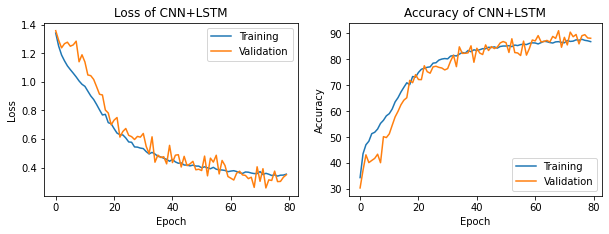

In [35]:
plot_loss_acc(metrics['train_loss'], metrics['val_loss'], metrics['train_accuracy'], metrics['val_accuracy'], model='CNN+LSTM')

# Classify CNN+GRU Model Over All Subjects 

In [36]:
# define constants
constants = { 
    'alpha': 1.0, # default = 1.0
    'dropout': 0.5
}

NUM_EPOCHS = 80

NUM_SUBJECTS = 9

In [37]:
# define model/optimizer
model = GRU_Model(constants).cuda()
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.001)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [38]:
X_train_valid, y_train_valid, X_test, y_test = load_data(data_path, verbose=False)
data_loaders = setup_data(X_train_valid, y_train_valid, X_test, y_test, batch_size=64, verbose=False)

metrics = run_training_validation(model, optimizer, data_loaders, 20, verbose=True)
test_acc, test_loss = run_test(model, data_loaders, verbose=True)

Progress: Epoch 1, Loss: 1.0804901123046875, Training Accuracy: 50.89637756347656, Validation Accuracy: 61.26871871948242
Progress: Epoch 2, Loss: 0.7414575815200806, Training Accuracy: 69.6611557006836, Validation Accuracy: 65.16942596435547
Progress: Epoch 3, Loss: 0.5602629780769348, Training Accuracy: 74.79314422607422, Validation Accuracy: 68.75492095947266
Progress: Epoch 4, Loss: 0.44010430574417114, Training Accuracy: 79.41292572021484, Validation Accuracy: 73.71946716308594
Progress: Epoch 5, Loss: 0.3451474905014038, Training Accuracy: 85.19503784179688, Validation Accuracy: 76.55634307861328
Progress: Epoch 6, Loss: 0.2894265353679657, Training Accuracy: 87.58865356445312, Validation Accuracy: 77.06855773925781
Progress: Epoch 7, Loss: 0.24889257550239563, Training Accuracy: 89.22379302978516, Validation Accuracy: 78.25059509277344
Progress: Epoch 8, Loss: 0.21719951927661896, Training Accuracy: 90.6422348022461, Validation Accuracy: 79.78723907470703
Progress: Epoch 9, Loss

In [39]:
# define model/optimizer
model = CNN_GRU_Model(constants).cuda()
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.001)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [40]:
X_train_valid, y_train_valid, X_test, y_test = load_data(data_path, verbose=False)
data_loaders = setup_data(X_train_valid, y_train_valid, X_test, y_test, batch_size=64, verbose=False)

metrics = run_training_validation(model, optimizer, data_loaders, NUM_EPOCHS, verbose=True)
test_acc, test_loss = run_test(model, data_loaders, verbose=True)

Progress: Epoch 1, Loss: 1.2923263311386108, Training Accuracy: 33.95390319824219, Validation Accuracy: 29.275020599365234
Progress: Epoch 2, Loss: 1.2067493200302124, Training Accuracy: 42.819149017333984, Validation Accuracy: 34.239559173583984
Progress: Epoch 3, Loss: 1.1439414024353027, Training Accuracy: 46.11899185180664, Validation Accuracy: 39.83451461791992
Progress: Epoch 4, Loss: 1.1452325582504272, Training Accuracy: 49.14302444458008, Validation Accuracy: 44.87785720825195
Progress: Epoch 5, Loss: 1.0992830991744995, Training Accuracy: 52.88612747192383, Validation Accuracy: 50.94562911987305
Progress: Epoch 6, Loss: 0.933124840259552, Training Accuracy: 56.609535217285156, Validation Accuracy: 57.525611877441406
Progress: Epoch 7, Loss: 0.7454049587249756, Training Accuracy: 60.313236236572266, Validation Accuracy: 58.03782272338867
Progress: Epoch 8, Loss: 0.6628772020339966, Training Accuracy: 61.93853759765625, Validation Accuracy: 60.16548156738281
Progress: Epoch 9, 

### Plot Results

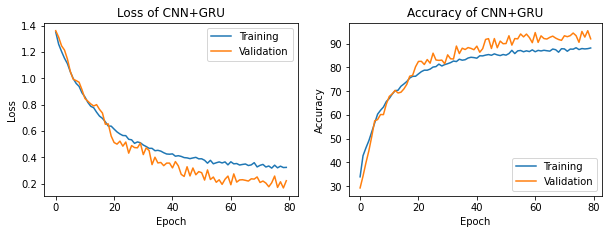

In [41]:
plot_loss_acc(metrics['train_loss'], metrics['val_loss'], metrics['train_accuracy'], metrics['val_accuracy'], model='CNN+GRU')
# plot_compare_models(cnn_test, lstm_test, gru_test, acc_type='test')

# Classify All Models as Function of Time (over all subjects)

In [10]:
# define constants
constants = { 
    'alpha': 1.0, # default = 1.0
    'dropout': 0.5
}

NUM_EPOCHS = 50

SAMPLE_MULT = np.array(range(10, 0, -1))

## CNN

In [11]:
time_metrics_cnn, time_test_acc_cnn = [], []
for m in SAMPLE_MULT:

    model = CNN_Model(constants)
    optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.001)  


    X_train_valid, y_train_valid, X_test, y_test = load_data(data_path, sample_mult=m, verbose=False)
    data_loaders = setup_data(X_train_valid, y_train_valid, X_test, y_test, batch_size=64, verbose=False)

    print(f'\t\t*** TOTAL TIME = {1000/m} ***')
    metrics = run_training_validation(model, optimizer, data_loaders, NUM_EPOCHS, verbose=True)
    test_acc, test_loss = run_test(model, data_loaders, verbose=True)

    time_metrics_cnn.append(metrics)
    time_test_acc_cnn.append(test_acc)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


		*** TOTAL TIME = 100.0 ***
Progress: Epoch 1, Loss: 1.4117146730422974, Training Accuracy: 31.57505989074707, Validation Accuracy: 36.32781982421875
Progress: Epoch 2, Loss: 1.322110652923584, Training Accuracy: 41.80949783325195, Validation Accuracy: 43.83372497558594
Progress: Epoch 3, Loss: 1.1098029613494873, Training Accuracy: 48.79826736450195, Validation Accuracy: 50.039398193359375
Progress: Epoch 4, Loss: 0.8028250336647034, Training Accuracy: 54.348899841308594, Validation Accuracy: 55.47675323486328
Progress: Epoch 5, Loss: 0.9372776746749878, Training Accuracy: 58.29885482788086, Validation Accuracy: 59.141056060791016
Progress: Epoch 6, Loss: 0.7089059948921204, Training Accuracy: 61.14558410644531, Validation Accuracy: 61.85973358154297
Progress: Epoch 7, Loss: 0.7140458226203918, Training Accuracy: 62.854610443115234, Validation Accuracy: 62.7856559753418
Progress: Epoch 8, Loss: 0.444468230009079, Training Accuracy: 64.30752563476562, Validation Accuracy: 64.913322448

## LSTM

In [12]:
time_metrics_lstm, time_test_acc_lstm = [], []
for m in SAMPLE_MULT:

    model = CNN_LSTM_Model(constants)
    optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.001)  


    X_train_valid, y_train_valid, X_test, y_test = load_data(data_path, sample_mult=m, verbose=False)
    data_loaders = setup_data(X_train_valid, y_train_valid, X_test, y_test, batch_size=64, verbose=False)

    print(f'\t\t*** TOTAL TIME = {1000/m} ***')
    metrics = run_training_validation(model, optimizer, data_loaders, NUM_EPOCHS, verbose=True)
    test_acc, test_loss = run_test(model, data_loaders, verbose=True)

    time_metrics_lstm.append(metrics)
    time_test_acc_lstm.append(test_acc)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


		*** TOTAL TIME = 100.0 ***
Progress: Epoch 1, Loss: 1.2483583688735962, Training Accuracy: 33.875099182128906, Validation Accuracy: 34.04255294799805
Progress: Epoch 2, Loss: 1.2317745685577393, Training Accuracy: 43.14913558959961, Validation Accuracy: 43.459415435791016
Progress: Epoch 3, Loss: 1.3488177061080933, Training Accuracy: 46.71493148803711, Validation Accuracy: 45.823482513427734
Progress: Epoch 4, Loss: 1.1725023984909058, Training Accuracy: 48.74901580810547, Validation Accuracy: 48.128448486328125
Progress: Epoch 5, Loss: 0.9891572594642639, Training Accuracy: 51.23621368408203, Validation Accuracy: 52.10795974731445
Progress: Epoch 6, Loss: 0.9963105320930481, Training Accuracy: 52.39854431152344, Validation Accuracy: 54.215919494628906
Progress: Epoch 7, Loss: 0.9006720185279846, Training Accuracy: 54.506500244140625, Validation Accuracy: 57.289207458496094
Progress: Epoch 8, Loss: 0.9356095194816589, Training Accuracy: 56.14164352416992, Validation Accuracy: 58.037

## GRU

In [13]:
time_metrics_gru, time_test_acc_gru = [], []
for m in SAMPLE_MULT:

    model = CNN_GRU_Model(constants)
    optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.001)  


    X_train_valid, y_train_valid, X_test, y_test = load_data(data_path, sample_mult=m, verbose=False)
    data_loaders = setup_data(X_train_valid, y_train_valid, X_test, y_test, batch_size=64, verbose=False)

    print(f'\t\t*** TOTAL TIME = {1000/m} ***')
    metrics = run_training_validation(model, optimizer, data_loaders, NUM_EPOCHS, verbose=True)
    test_acc, test_loss = run_test(model, data_loaders, verbose=True)

    time_metrics_gru.append(metrics)
    time_test_acc_gru.append(test_acc)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


		*** TOTAL TIME = 100.0 ***
Progress: Epoch 1, Loss: 1.3508937358856201, Training Accuracy: 32.13652420043945, Validation Accuracy: 34.90937805175781
Progress: Epoch 2, Loss: 1.304762601852417, Training Accuracy: 41.7060661315918, Validation Accuracy: 42.63199234008789
Progress: Epoch 3, Loss: 1.288970947265625, Training Accuracy: 46.537628173828125, Validation Accuracy: 45.27186584472656
Progress: Epoch 4, Loss: 1.138960599899292, Training Accuracy: 50.83727264404297, Validation Accuracy: 51.85185241699219
Progress: Epoch 5, Loss: 0.9334069490432739, Training Accuracy: 55.32406997680664, Validation Accuracy: 53.92041015625
Progress: Epoch 6, Loss: 1.0709095001220703, Training Accuracy: 58.402286529541016, Validation Accuracy: 57.88022232055664
Progress: Epoch 7, Loss: 0.8544034957885742, Training Accuracy: 60.39204025268555, Validation Accuracy: 62.82505798339844
Progress: Epoch 8, Loss: 0.9403454661369324, Training Accuracy: 62.056739807128906, Validation Accuracy: 63.67218399047851

### Plot All Results

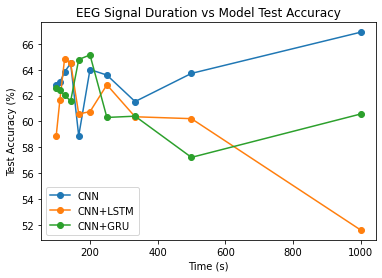

In [14]:
times = 1000 / SAMPLE_MULT
plot_all_subjects_over_time(times, time_test_acc_cnn, time_test_acc_lstm, time_test_acc_gru)